In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import math

In [2]:
# Create noisy data
x_data = np.linspace(-10, 10, num=1000)
y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)
print('Data created successfully')


Data created successfully


In [3]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               256       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 16,899
Trainable params: 16,899
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Training
fit128 = model.fit( x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 618us/step - loss: 0.4136
Epoch 2/100
32/32 [==============================] - 0s 593us/step - loss: 0.1941
Epoch 3/100
32/32 [==============================] - 0s 547us/step - loss: 0.1918
Epoch 4/100
32/32 [==============================] - 0s 572us/step - loss: 0.1883
Epoch 5/100
32/32 [==============================] - 0s 641us/step - loss: 0.2067
Epoch 6/100
32/32 [==============================] - 0s 690us/step - loss: 0.2097
Epoch 7/100
32/32 [==============================] - 0s 618us/step - loss: 0.1857
Epoch 8/100
32/32 [==============================] - 0s 554us/step - loss: 0.2215
Epoch 9/100
32/32 [==============================] - 0s 617us/step - loss: 0.1889
Epoch 10/100
32/32 [==============================] - 0s 580us/step - loss: 0.1878
Epoch 11/100
32/32 [==============================] - 0s 662us/step - loss: 0.1896
Epoch 12/100
32/32 [==============================] - 0s 609us/step - loss: 0.1962
Epoch 13/100


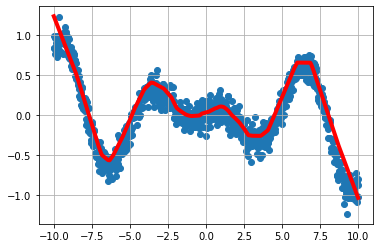

In [5]:
# Compute the output 
y_predicted = model.predict(x_data)

# Display the result
plt.scatter(x_data[::1], y_data[::1])
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()

In [6]:
mse = tf.keras.losses.MeanSquaredError()
mse(y_data,y_predicted).numpy()

0.3779828

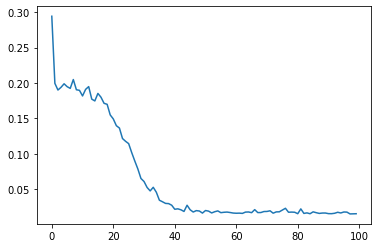

In [7]:
plt.plot(fit128.history['loss'])

In [8]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


In [9]:
fit64 = model.fit( x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 473us/step - loss: 0.2270
Epoch 2/100
32/32 [==============================] - 0s 518us/step - loss: 0.1892
Epoch 3/100
32/32 [==============================] - 0s 450us/step - loss: 0.1879
Epoch 4/100
32/32 [==============================] - 0s 560us/step - loss: 0.1892
Epoch 5/100
32/32 [==============================] - 0s 682us/step - loss: 0.1744
Epoch 6/100
32/32 [==============================] - 0s 434us/step - loss: 0.1754
Epoch 7/100
32/32 [==============================] - 0s 568us/step - loss: 0.2086
Epoch 8/100
32/32 [==============================] - 0s 543us/step - loss: 0.1738
Epoch 9/100
32/32 [==============================] - 0s 552us/step - loss: 0.1756
Epoch 10/100
32/32 [==============================] - 0s 565us/step - loss: 0.1818
Epoch 11/100
32/32 [==============================] - 0s 619us/step - loss: 0.1733
Epoch 12/100
32/32 [==============================] - 0s 603us/step - loss: 0.1875
Epoch 13/100


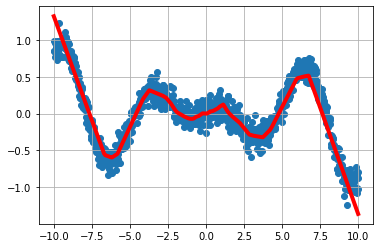

In [10]:
# Compute the output 
y_predicted = model.predict(x_data)

# Display the result
plt.scatter(x_data[::1], y_data[::1])
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()

In [11]:
mse = tf.keras.losses.MeanSquaredError()
mse(y_data,y_predicted).numpy()

0.40009254

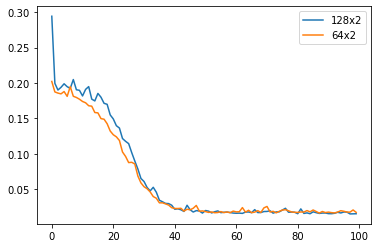

In [12]:
plt.plot(fit128.history['loss'],label='128x2')
plt.plot(fit64.history['loss'],label='64x2')
plt.legend()

In [13]:
# Create noisy data 3 dimensions
x_data1 = np.linspace(-10, 10, num=1000)
x_data2 = np.linspace(-10, 10, num=1000)

x= np.array((x_data1,x_data2)).T

z_data = 0.1*(x_data1+x_data2)*np.cos(x_data1+x_data2) + 0.1*np.random.normal(size=1000)

In [14]:
def draw3Dim (x, y, z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x,y, z, marker='o')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.title("Représentation du dataset réduit en 3 dimensions ")

    plt.show()

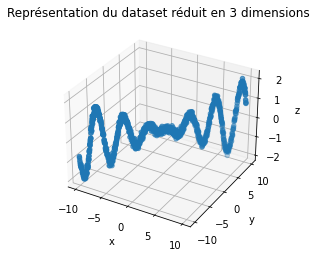

In [15]:
draw3Dim (x_data1, x_data2, z_data)

In [16]:
# t = np.linspace(-10,10,num=1000)
# x_data1 = np
# x_data2 

array([-10.        ,  -9.97997998,  -9.95995996,  -9.93993994,
        -9.91991992,  -9.8998999 ,  -9.87987988,  -9.85985986,
        -9.83983984,  -9.81981982,  -9.7997998 ,  -9.77977978,
        -9.75975976,  -9.73973974,  -9.71971972,  -9.6996997 ,
        -9.67967968,  -9.65965966,  -9.63963964,  -9.61961962,
        -9.5995996 ,  -9.57957958,  -9.55955956,  -9.53953954,
        -9.51951952,  -9.4994995 ,  -9.47947948,  -9.45945946,
        -9.43943944,  -9.41941942,  -9.3993994 ,  -9.37937938,
        -9.35935936,  -9.33933934,  -9.31931932,  -9.2992993 ,
        -9.27927928,  -9.25925926,  -9.23923924,  -9.21921922,
        -9.1991992 ,  -9.17917918,  -9.15915916,  -9.13913914,
        -9.11911912,  -9.0990991 ,  -9.07907908,  -9.05905906,
        -9.03903904,  -9.01901902,  -8.998999  ,  -8.97897898,
        -8.95895896,  -8.93893894,  -8.91891892,  -8.8988989 ,
        -8.87887888,  -8.85885886,  -8.83883884,  -8.81881882,
        -8.7987988 ,  -8.77877878,  -8.75875876,  -8.73